In [109]:
# !pip install pandas
import pandas as pd
import os

In [110]:
file_dir = "/home/huyhoang/Workspace/DIT-Master/MSS-2/AlgorithmAutonomousSystems/rcognita-edu/rosdata/N_CTRL/Init_angle_1.5707963267948966_seed_1_Nactor_3/"
fn = os.listdir(file_dir)
fn = sorted(fn, key=lambda x: int(x.split(".")[0]))[-1]

file_path = os.path.join(
    file_dir,
    fn
)
with open(file_path) as f:
    data = f.read().splitlines()[20:]

data
fn

'1715370432.971559__3wrobotNI__N_CTRL__2024-05-10__21h47m12s__run01.csv'

In [111]:
headers = data[0].split(",")
data_dict = {}
for line in data[1:]:
    line_info = line.split(",")
    for idx, header in enumerate(headers):
        if header not in data_dict:
            data_dict[header] = [float(line_info[idx])]
        else:
            data_dict[header].append(float(line_info[idx]))

df = pd.DataFrame(data_dict)
df

,t [s],x [m],y [m],alpha [rad],stage_obj,accum_obj,v [m/s],omega [rad/s]
0,6489.329,-2.998469,-3.000007,0.044550,1.0,0.01,0.848313,0.488401
1,6489.332,-2.998469,-3.000007,0.044550,1.0,0.02,0.848313,0.488401
2,6489.432,-2.998480,-3.000007,0.044646,1.0,0.03,0.848314,0.488351
3,6489.532,-2.995896,-2.999871,0.047319,1.0,0.04,0.847930,0.487280
4,6489.632,-2.980594,-2.999100,0.052378,1.0,0.05,0.845660,0.486332
...,...,...,...,...,...,...,...,...
205,6509.732,-0.004627,-0.019267,1.305920,1.0,2.06,0.003963,0.214873
206,6509.832,-0.004509,-0.018859,1.327775,1.0,2.07,0.003878,0.204574
207,6509.932,-0.004401,-0.018447,1.348594,1.0,2.08,0.003793,0.194493
208,6510.032,-0.004302,-0.018034,1.368398,1.0,2.09,0.003708,0.184614


<Axes: title={'center': 'runned trajectory'}, xlabel='x [m]'>

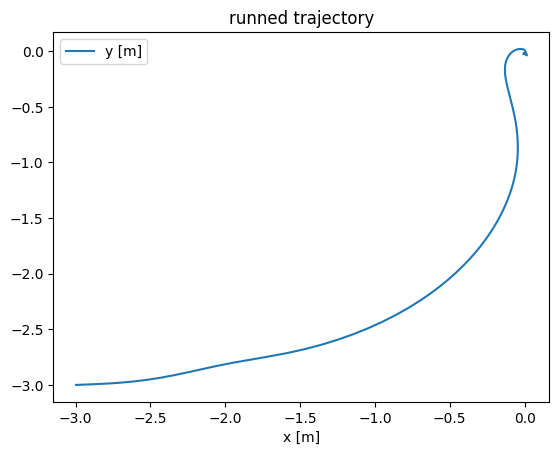

In [112]:
# df.drop(columns=["t [s]", "stage_obj", "accum_obj"]).plot()
df = df[df["t [s]"] > 0.0005]
df.plot(x="x [m]", y="y [m]", title="runned trajectory")

<Axes: title={'center': 'runned trajectory'}, xlabel='t [s]'>

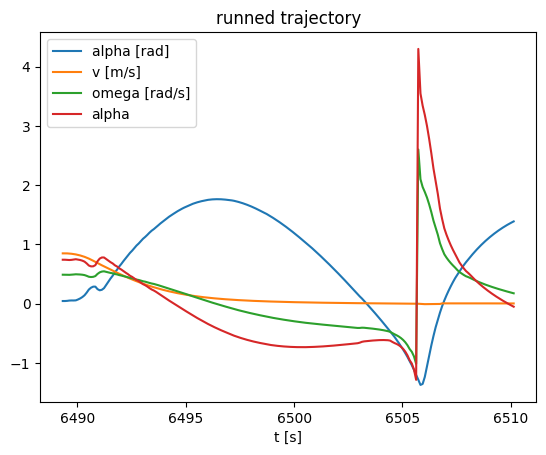

In [113]:
import numpy as np

df["alpha"] = df.apply(lambda row:-row["alpha [rad]"] + np.arctan2(-row["y [m]"], -row["x [m]"]), axis=1)
# df.plot(x="t [s]", y="alpha", title="runned trajectory")
df.plot(x="t [s]", y=["alpha [rad]", "v [m/s]", "omega [rad/s]", "alpha"], title="runned trajectory")